# Caso de Estudio - Métricas y Desempeño en la clasificación

In [1]:
import pandas as pd

iris = pd.read_csv("datasets/iris.csv")

iris.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
106,4.9,2.5,4.5,1.7,Virginica
35,5.0,3.2,1.2,0.2,Setosa
36,5.5,3.5,1.3,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
62,6.0,2.2,4.0,1.0,Versicolor


In [12]:
X = iris[ ["sepal.length", "sepal.width"] ].values

y = iris["variety"]

X.shape, y.shape

((150, 2), (150,))

In [13]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import LinearSVC
from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import RidgeClassifier
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.naive_bayes import GaussianNB

clf = SVC(kernel="linear")

clf.fit(X, y)

clf.score(X, y)

0.82

In [14]:
yp = clf.predict(X)

import random

indices = [ random.choice(range(len(y))) for _ in range(5) ]

print(indices)
print([y[i] for i in indices])
print([yp[i] for i in indices])

[86, 136, 52, 138, 145]
['Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica']
['Virginica', 'Virginica', 'Virginica', 'Versicolor', 'Virginica']


In [20]:
clf.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

La precisión es la capacidad de no haber etiquetado cosas positivas, siendo en realidad negativas (comparación del verdadero positivo contra el falso positivo).

In [19]:
from sklearn.metrics import precision_score

precision_score(y, yp, average=None)

array([1.        , 0.71698113, 0.74468085])

El *recall* es la capacidad de evidenciar todos aquellos que fueron positivos, considerando que no lo eran (comparación del verdadero positivo contra el falso negativo).

In [21]:
from sklearn.metrics import recall_score

recall_score(y, yp, average=None)

array([1.  , 0.76, 0.7 ])

In [22]:
from sklearn.metrics import f1_score

f1_score(y, yp, average=None)

array([1.        , 0.73786408, 0.72164948])

Visualización del *Precision* versus el *Recall*

In [27]:
y[:5].values

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype=object)

In [32]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

ye = OneHotEncoder().fit_transform(np.array(y).reshape(-1, 1)).toarray()

# ye - Es una matriz de 1's y 0's representando 3 categorías
ye[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


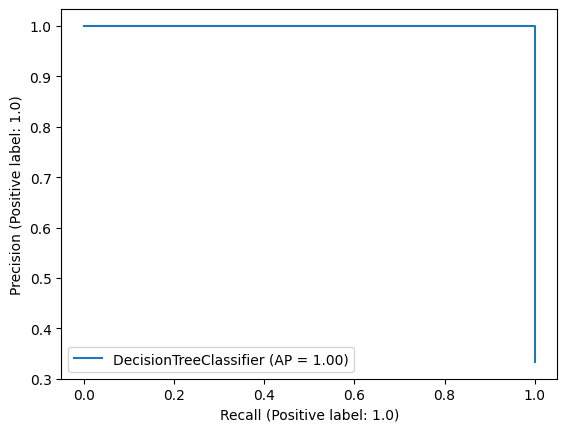

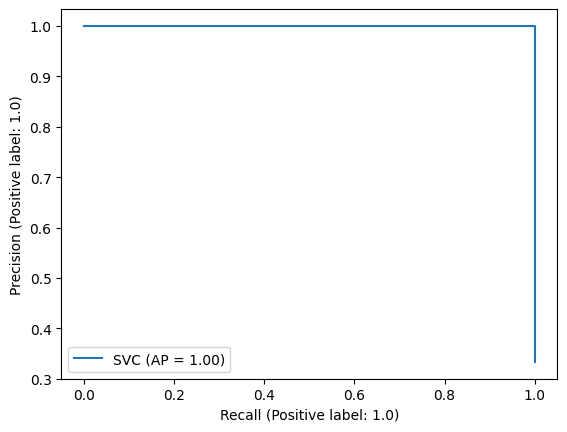

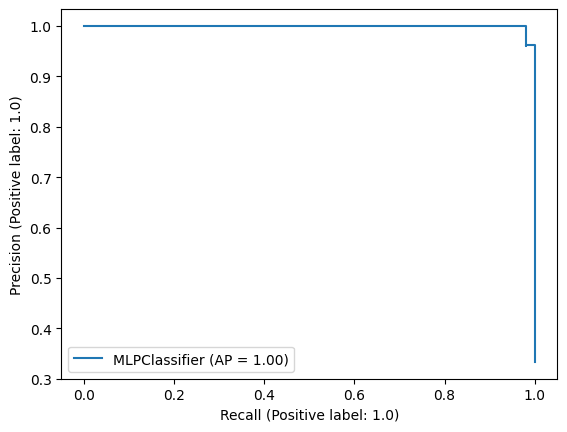

In [36]:
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(X, ye[:, 0])

clf2 = SVC()
clf2.fit(X, ye[:, 0])

clf3 = MLPClassifier()
clf3.fit(X, ye[:, 0])

import matplotlib.pyplot as plt

PrecisionRecallDisplay.from_estimator(clf1, X, ye[:, 0])
PrecisionRecallDisplay.from_estimator(clf2, X, ye[:, 0])
PrecisionRecallDisplay.from_estimator(clf3, X, ye[:, 0])
plt.show()

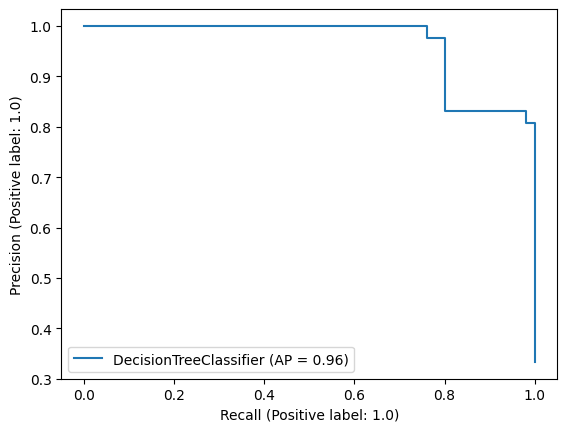

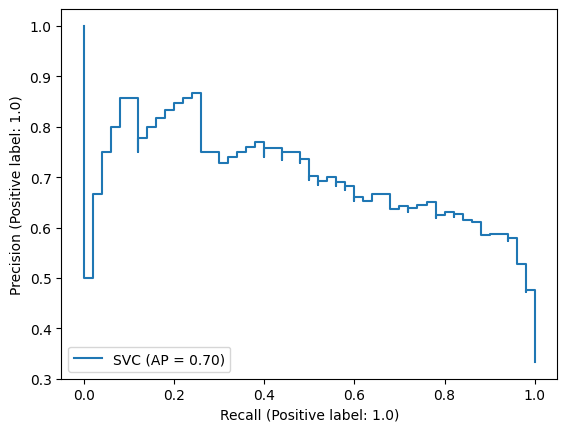

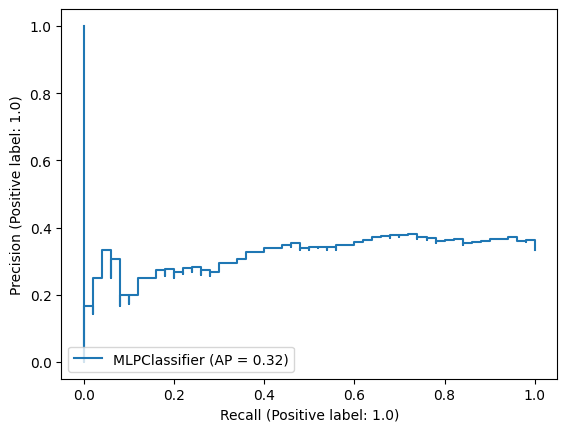

In [37]:
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(X, ye[:, 1])

clf2 = SVC()
clf2.fit(X, ye[:, 1])

clf3 = MLPClassifier()
clf3.fit(X, ye[:, 1])

import matplotlib.pyplot as plt

PrecisionRecallDisplay.from_estimator(clf1, X, ye[:, 1])
PrecisionRecallDisplay.from_estimator(clf2, X, ye[:, 1])
PrecisionRecallDisplay.from_estimator(clf3, X, ye[:, 1])
plt.show()

/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


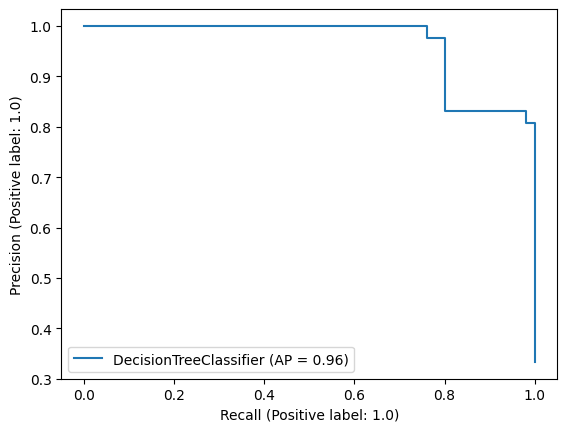

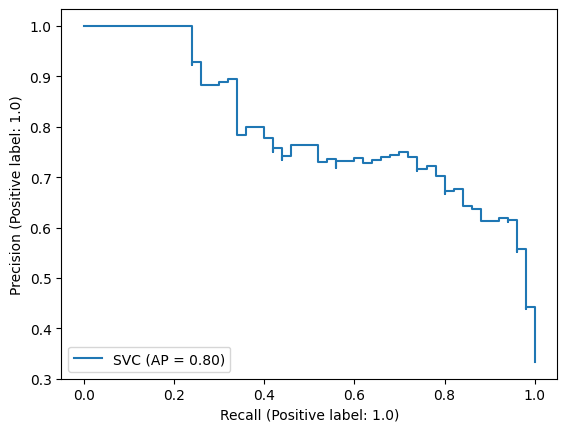

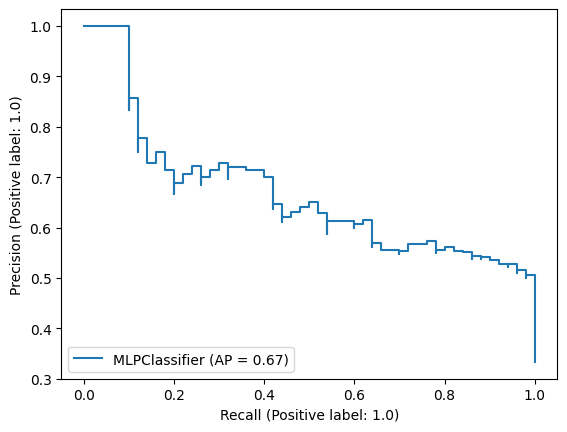

In [38]:
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(X, ye[:, 2])

clf2 = SVC()
clf2.fit(X, ye[:, 2])

clf3 = MLPClassifier()
clf3.fit(X, ye[:, 2])

import matplotlib.pyplot as plt

PrecisionRecallDisplay.from_estimator(clf1, X, ye[:, 2])
PrecisionRecallDisplay.from_estimator(clf2, X, ye[:, 2])
PrecisionRecallDisplay.from_estimator(clf3, X, ye[:, 2])
plt.show()

Para grandes volúmenes de datos, lo mejor es tomar pequeñas muestras aleatorias como de unos 50 o 100 muestras para analizar el desempeño del aprendizaje en esas muestras aleatorias y proyectar que con el volumen más grande se comportará de manera similar, tomando en cuenta que no es del todo cierto, pero al menos podríamos comparar qué algoritmo resolvería mejor nuestro problema para esas muestras aleatorias y proyectar que será el mejor algoritmo a utilizar para las muestras totales.

## Estrategia de aprendizaje y evaluación (train-test split)

El *train* (datos de aprendizaje) son los datos que se usarán para entrenar al modelo y consideran un gran porcentaje de los datos.

El *test* (datos de validación) son los datos que se usarán para determinar que tan bien logra predecir los valores el estimador. Estos representan un pequeño porcentaje de los datos.

Si el modelo se sobre ajusta, será fácil determinar cuántas veces lo hace bien en datos que utilizó en su aprendizaje, por ejemplo, podríamos entrenar un modelo con una base de datos de rostros de personas encontradas en internet y validar el modelo con un conjunto de rostros de personas de nuestra empresa.

In [40]:
X.shape, y.shape

((150, 2), (150,))

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 2), (30, 2), (120,), (30,))

In [43]:
X[:5], y[:5]

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6]]),
 0    Setosa
 1    Setosa
 2    Setosa
 3    Setosa
 4    Setosa
 Name: variety, dtype: object)

In [44]:
X_train[:5], y_train[:5]

(array([[7.2, 3.6],
        [6.9, 3.1],
        [6.9, 3.1],
        [5.9, 3.2],
        [4.6, 3.6]]),
 109     Virginica
 139     Virginica
 141     Virginica
 70     Versicolor
 22         Setosa
 Name: variety, dtype: object)

Los modelos de aprendizaje son suceptibles a sobreajustarse a los datos de entrenamiento, esto significa que aprenderán muy bien a clasificar los datos con los que fueron entrenados, pero, fallarán con datos reales o datos que están fuera de su entrenamiento.

In [47]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()

clf1.fit(X_train, y_train)

clf1.score(X_train, y_train)

0.95

In [48]:
clf1.score(X_test, y_test)

0.6333333333333333

In [50]:
from sklearn.svm import SVC

clf2 = SVC()

clf2.fit(X_train, y_train)

clf2.score(X_train, y_train)

0.8166666666666667

In [51]:
clf2.score(X_test, y_test)

0.8333333333333334

In [52]:
from sklearn.neural_network import MLPClassifier

clf3 = MLPClassifier()

clf3.fit(X_train, y_train)

clf3.score(X_train, y_train)

/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6833333333333333

In [53]:
clf3.score(X_test, y_test)

0.6

In [54]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

ye_train = OneHotEncoder().fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
ye_test = OneHotEncoder().fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

# ye - Es una matriz de 1's y 0's representando 3 categorías
ye_train[:5], ye_test[:5]

(array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


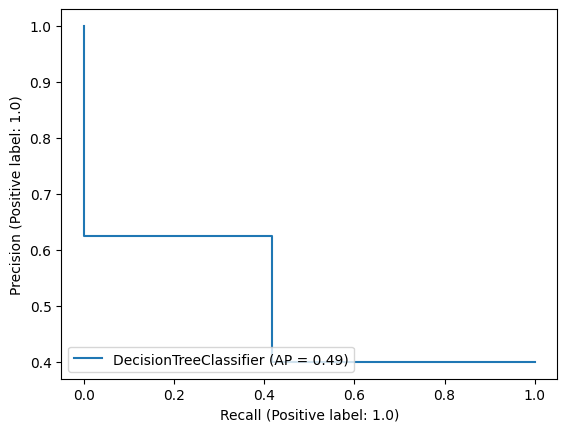

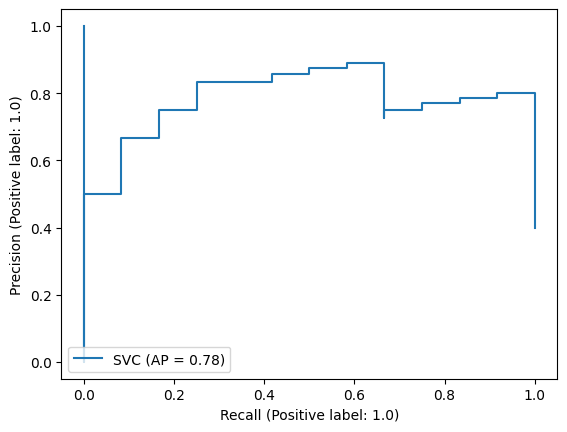

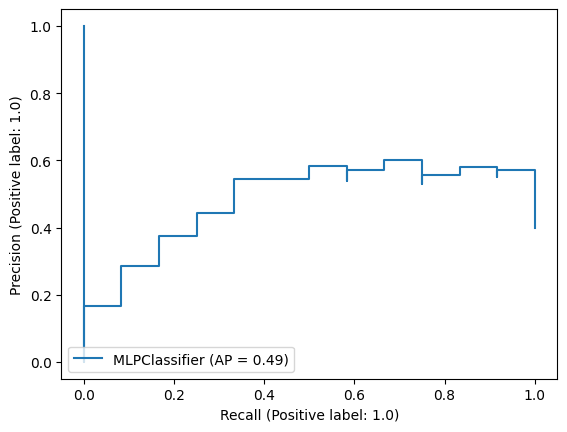

In [56]:
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, ye_train[:, 1])

clf2 = SVC()
clf2.fit(X_train, ye_train[:, 1])

clf3 = MLPClassifier()
clf3.fit(X_train, ye_train[:, 1])

import matplotlib.pyplot as plt

PrecisionRecallDisplay.from_estimator(clf1, X_test, ye_test[:, 1])
PrecisionRecallDisplay.from_estimator(clf2, X_test, ye_test[:, 1])
PrecisionRecallDisplay.from_estimator(clf3, X_test, ye_test[:, 1])
plt.show()